In [1]:
!wget https://github.com/Martina-Wei/Project-Digital-Image-and-Video-Processing/raw/main/resource/tram.JPG

--2021-05-27 05:52:48--  https://github.com/Martina-Wei/Project-Digital-Image-and-Video-Processing/raw/main/resource/tram.JPG
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Martina-Wei/Project-Digital-Image-and-Video-Processing/main/resource/tram.JPG [following]
--2021-05-27 05:52:48--  https://raw.githubusercontent.com/Martina-Wei/Project-Digital-Image-and-Video-Processing/main/resource/tram.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11730944 (11M) [application/octet-stream]
Saving to: ‘tram.JPG.2’

tram.JPG.2          100%[===================>]  11.19M  33.1MB/s    in 0.3s    

2021-

## Load Image

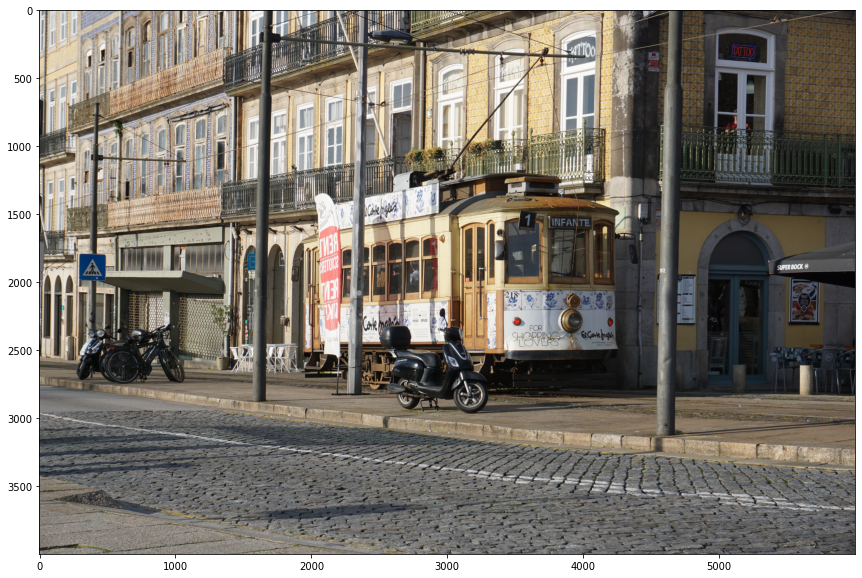

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./tram.JPG')
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img_cvt)
plt.show()

## down sampling

In [4]:
def display_image_in_actual_size(img):
    dpi = 72
    height, width, depth = img.shape
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    plt.show()

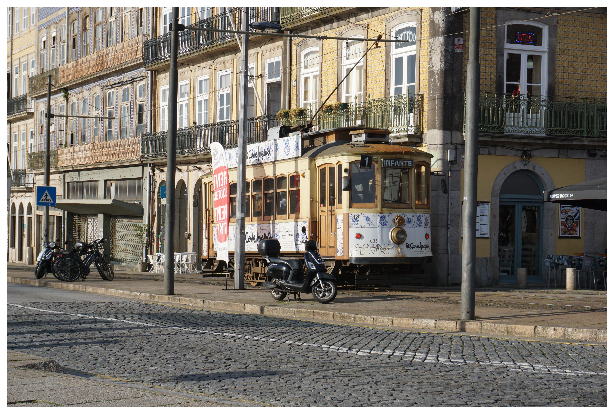

In [5]:
# down sampling scale
scale = 0.1

h, w = len(img), len(img[0])
d_h, d_w = h*scale, w*scale
d_img = cv2.resize(img_cvt, (int(d_w),int(d_h)))

display_image_in_actual_size(d_img)

##Upsampling (frequency domain)

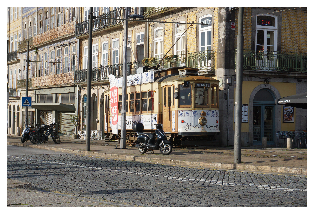

In [6]:
# down sampling scale frist for since the original size is huge.

scale = 0.05
h, w = len(img), len(img[0])
d_h, d_w = int(h*scale), int(w*scale)
d_img = cv2.resize(img_cvt, (int(d_w),int(d_h)))

plt.show()
display_image_in_actual_size(d_img)

In [7]:
def fft2bychannel(img):
  f = np.zeros((img.shape[0], img.shape[1], 3), dtype='complex64')
  for i in range(3):
    f[:,:,i] = np.fft.fft2(img[:,:,i])
  return f

def fftshiftbychannel(f):
  fshift = np.zeros((f.shape[0], f.shape[1], 3), dtype='complex64')
  for i in range(3):
    fshift[:,:,i] = np.fft.fftshift(f[:,:,i])
  return fshift


In [20]:
def spectrum_by_channel(f):
  magnitude_spectrum = np.zeros((f.shape[0], f.shape[1], 3), dtype='uint8')
  for i in range(3):
    magnitude_spectrum[:, :, i] = np.array(np.log(np.abs(f[:, :, i])), dtype='uint8')
  return magnitude_spectrum

Text(0.5, 1.0, 'img in frequency domain after fshift')

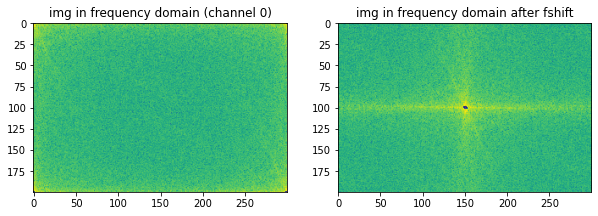

In [26]:
f = fft2bychannel(d_img)
fshift = fftshiftbychannel(f)

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(121)
plt.imshow(np.array(20*np.log(np.abs(f[:, :, 0])), dtype='uint8'))
plt.title('img in frequency domain (channel 0)')

ax = fig.add_subplot(122)
plt.imshow(np.array(20*np.log(np.abs(fshift[:, :, 0])), dtype='uint8'))
plt.title('img in frequency domain after fshift')

zero paddinng and ffshift

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


Text(0.5, 1.0, 'img in frequency domain after fshift')

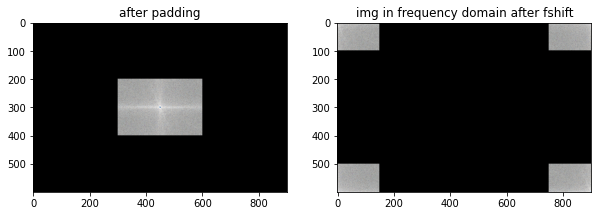

In [27]:
scale = 3

padding_fshift = np.zeros((d_h*scale, d_w*scale, 3), dtype='complex64')
padding_fshift[d_h:d_h*2, d_w:d_w*2, :] = fshift
f_ishift = fftshiftbychannel(padding_fshift)

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(121)
plt.imshow(np.array(20*np.log(np.abs(padding_fshift)), dtype='uint8'))
plt.title('after padding')

ax = fig.add_subplot(122)
plt.imshow(np.array(20*np.log(np.abs(f_ishift)), dtype='uint8'))
plt.title('img in frequency domain after fshift')

image fft with upscale

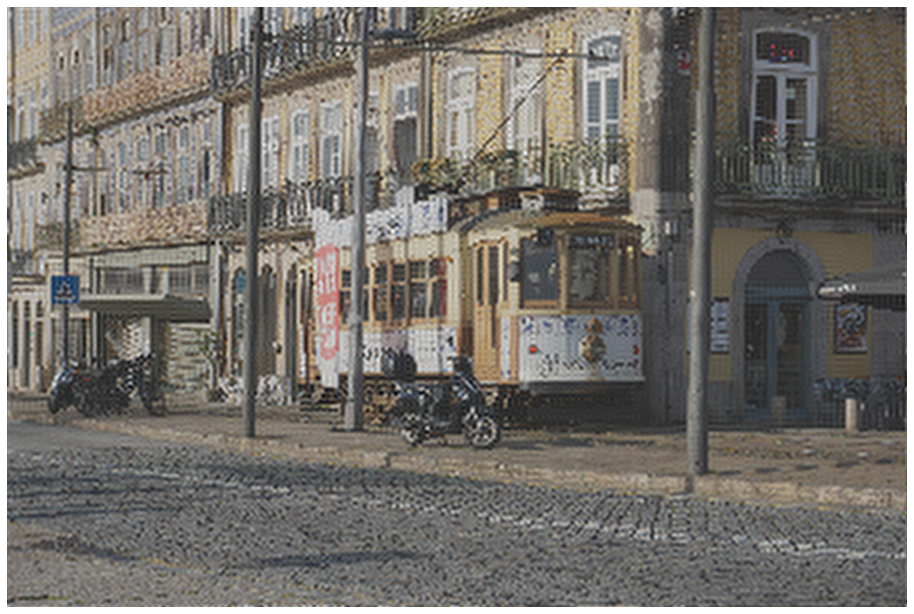

In [28]:
img_back = np.zeros((d_h*scale, d_w*scale, 3), dtype='complex64')

ma = 0 # for scaling
mi = 1000000

for i in range(3):
  img_back[:,:,i] = np.fft.ifft2(f_ishift[:,:,i])
  ma = max(ma, np.max(img_back[:, :, i]))
  mi = min(mi, np.min(img_back[:, :, i]))

img_back = 255*np.abs((img_back - mi) / (ma - mi))
img_back = np.array(img_back, dtype='uint16')
display_image_in_actual_size(img_back)